In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import os

%matplotlib inline
warnings.filterwarnings('ignore')

plt.rcParams['font.family'] = 'NanumGothic'

In [ ]:
!pip install finance-datareader

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 48 kB 2.7 MB/s 


In [ ]:
import FinanceDataReader as fdr

In [ ]:
Hyundai = fdr.DataReader('005380')

In [ ]:
STOCK_CODE = '005380'

In [ ]:
stock = fdr.DataReader(STOCK_CODE)

In [ ]:
stock = fdr.DataReader(STOCK_CODE, '2018')

In [ ]:
from fbprophet import Prophet
from fbprophet.plot import plot_plotly, plot_components_plotly

In [ ]:
stock['y'] = stock['Close']
stock['ds'] = stock.index

In [ ]:
stock.head()

,Open,High,Low,Close,Volume,Change,y,ds
Date,,,,,,,,
2018-01-02,150500,153000,149000,149500,731763,-0.041667,149500,2018-01-02
2018-01-03,149000,151000,149000,150500,450874,0.006689,150500,2018-01-03
2018-01-04,150500,151000,146000,146500,931558,-0.026578,146500,2018-01-04
2018-01-05,146000,149000,145500,149000,463695,0.017065,149000,2018-01-05
2018-01-08,148500,151000,147500,151000,482619,0.013423,151000,2018-01-08


In [ ]:
m = Prophet()
m.fit(stock)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
future = m.make_future_dataframe(periods=30)
future.tail()

,ds
1120,2022-07-10
1121,2022-07-11
1122,2022-07-12
1123,2022-07-13
1124,2022-07-14


In [ ]:
forecast = m.predict(future)
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
1120,2022-07-10,167789.831471,148226.742669,171873.888683,167328.596699,168264.581251,-8219.995168,-8219.995168,-8219.995168,-2848.297707,-2848.297707,-2848.297707,-5371.697461,-5371.697461,-5371.697461,0.0,0.0,0.0,159569.836303
1121,2022-07-11,167635.025990,151252.047005,174380.224619,167099.493792,168165.961548,-4342.409235,-4342.409235,-4342.409235,994.797277,994.797277,994.797277,-5337.206512,-5337.206512,-5337.206512,0.0,0.0,0.0,163292.616754
1122,2022-07-12,167480.220508,151841.028533,175542.571290,166838.382862,168064.440816,-3954.540791,-3954.540791,-3954.540791,1313.976314,1313.976314,1313.976314,-5268.517105,-5268.517105,-5268.517105,0.0,0.0,0.0,163525.679717
1123,2022-07-13,167325.415027,151672.127026,174805.377771,166638.082668,167908.386868,-3691.833873,-3691.833873,-3691.833873,1476.880792,1476.880792,1476.880792,-5168.714666,-5168.714666,-5168.714666,0.0,0.0,0.0,163633.581153
1124,2022-07-14,167170.609546,150701.026394,175183.922441,166380.147608,167848.527371,-4075.300659,-4075.300659,-4075.300659,965.771668,965.771668,965.771668,-5041.072326,-5041.072326,-5041.072326,0.0,0.0,0.0,163095.308887


In [ ]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].iloc[-40:-20]

,ds,yhat,yhat_lower,yhat_upper
1085,2022-05-30,177884.541121,165880.904002,189321.141183
1086,2022-05-31,178388.302348,167118.472880,190499.344184
1087,2022-06-02,178352.569574,167226.061273,189670.976855
1088,2022-06-03,178448.600268,167075.293140,189537.797105
1089,2022-06-07,178903.289778,167827.743249,190185.630074
1090,2022-06-08,178972.369629,167777.410659,190657.873427
1091,2022-06-09,178315.487760,166689.883588,189930.749059
1092,2022-06-10,178095.545268,166691.679820,188396.290335
1093,2022-06-13,177221.894582,165659.307097,188849.689761
1094,2022-06-14,177127.815414,165737.934885,187901.888999


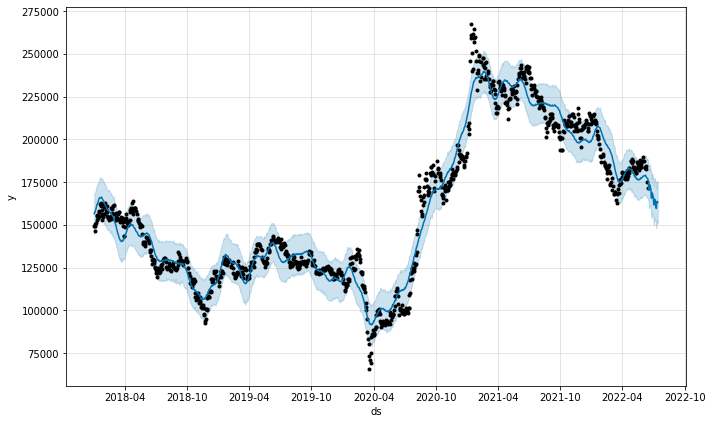

In [ ]:
fig = m.plot(forecast)

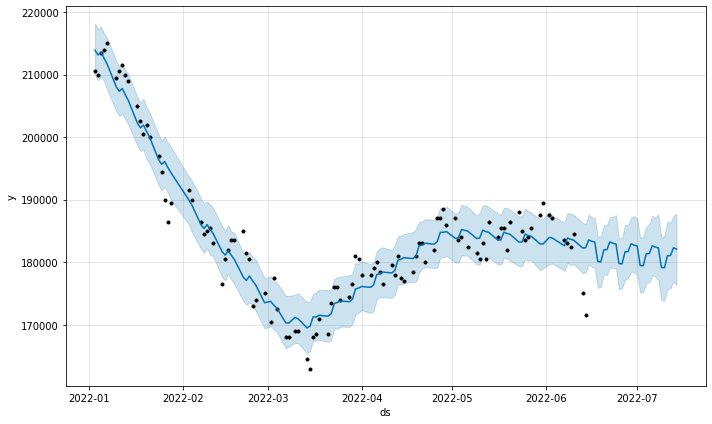

In [ ]:
fig = m.plot(forecast)